## Data project for EES SEA hire

In [1]:
import pandas as pd
import numpy as np
import os,sys, glob, shutil
%matplotlib inline

In [2]:
indir =  'G://My Drive/sdge_cluster_data/'

In [3]:
#Read cluster summary file
cs = pd.read_csv(glob.glob(os.path.join(indir,'*cluster_summary*'))[0], index_col=0)

In [4]:
cs.head()

kwh_ann_tot  customer_count  util  \
cluster                                                                         
sdge-com-SDG1-com_other-noKW-Care-0.0_0.2  7.756975e+04              72  sdge   
sdge-com-SDG1-com_other-noKW-Care-0.2_0.4  2.386990e+05              71  sdge   
sdge-com-SDG1-com_other-noKW-Care-0.4_0.6  4.120847e+05              72  sdge   
sdge-com-SDG1-com_other-noKW-Care-0.6_0.8  1.420902e+06              71  sdge   
sdge-com-SDG1-com_other-noKW-Care-0.8_1.0  1.620293e+07              72  sdge   

                                          sector building_type rate_class  \
cluster                                                                     
sdge-com-SDG1-com_other-noKW-Care-0.0_0.2    com     com_other       Care   
sdge-com-SDG1-com_other-noKW-Care-0.2_0.4    com     com_other       Care   
sdge-com-SDG1-com_other-noKW-Care-0.4_0.6    com     com_other       Care   
sdge-com-SDG1-com_other-noKW-Care-0.6_0.8    com     com_other       Care   
sdge-com-SDG1-com_other-noKW-Care-0.8_1.0    com     com_other       Care   

                                           kwh_bin kw_bin  
cluster                                                    
sdge-com-SDG1-com_other-noKW-Care-0.0_0.2  0.0_0.2   noKW  
sdge-com-SDG1-com_other-noKW-Care-0.2_0.4  0.2_0.4   noKW  
sdge-com-SDG1-com_other-noKW-Care-0.4_0.6  0.4_0.6   noKW  
sdge-com-SDG1-com_other-noKW-Care-0.6_0.8  0.6_0.8   noKW  
sdge-com-SDG1-com_other-noKW-Care-0.8_1.0  0.8_1.0   noKW

In [85]:
#Sum up gross demand, demand by end use, and demand by buildin gtype
copy=False
gross_dem=pd.DataFrame()
btype_agg_load=pd.DataFrame()
#eu_agg_load=pd.DataFrame
end_uses = []
i=0
for cn in cs.index:
    i+=1
    btype = cs.loc[cn, 'building_type']
    file = os.path.join(indir,cn+'.csv')
    c = pd.read_csv(file, index_col='hour_ending')
    #Get the end uses
    for eu in c.columns:
        if eu not in end_uses:
            end_uses.append(eu)
        if eu not in list(gross_dem.columns):
            gross_dem[eu] = c[eu]
        else:
            gross_dem[eu] += c[eu]
    
    #Add the "total" to the "other" end use for non-disaggregated clusters
    if 'other' not in c.columns:
        if 'other' not in gross_dem.columns:
            gross_dem['other'] = c['total']
        else:
            gross_dem['other'] += c['total']
            
        
    #Add to load for this building type
    if btype not in list(btype_agg_load.columns):
        btype_agg_load[btype] = c['total']
    else:
        btype_agg_load[btype] += c['total']
        
    
print(i)

201


In [86]:
#Get end uses
end_uses

['total',
 'hvac',
 'lighting',
 'other',
 'process',
 'pumping',
 'cooling',
 'poolpump',
 'plugload']

In [87]:
gross_dem.head()

total         other           hvac       lighting  \
hour_ending                                                             
1.0          1.839072e+06  1.226501e+06  105068.994851  169762.224934   
2.0          1.729853e+06  1.154984e+06  102487.755821  164926.453231   
3.0          1.663662e+06  1.106160e+06  104984.357487  163736.614349   
4.0          1.617637e+06  1.066686e+06  108248.034467  164205.244142   
5.0          1.612213e+06  1.055078e+06  112403.059907  168964.082007   

                  process       pumping     cooling      poolpump  \
hour_ending                                                         
1.0          42599.283325  21626.396374   75.402271  13750.944480   
2.0          42361.497009  21382.442590   83.952688  10577.649600   
3.0          41558.295112  20110.144453   94.826550  13327.838496   
4.0          41600.851246  20370.595724   94.826550  15231.815424   
5.0          41870.618012  19950.235579  103.888102  15020.262432   

                  plugload  
hour_ending                 
1.0          259688.402578  
2.0          233049.043218  
3.0          213689.648138  
4.0          201199.672880  
5.0          198822.601807

In [88]:
btype_agg_load.head()
#get the building types
btypes = btype_agg_load.columns

In [89]:
#1(a): total energy consumption two ways
#First, just use the total values in the summary file
print(cs['kwh_ann_tot'].sum()/1.e9)

#Second, sum up the hourly demand
print(gross_dem['total'].sum()/1.e9)

#Total is 19.11 TWh computed either way, with discrepancies down in the noise probably due to rounding errors in the cluster summary

19.112559886153946
19.112559886157584


In [90]:
#1b look at totals by building type, and sort
btype_agg_load.sum().sort_values(ascending=False)

#Residential buildings have the most, followed by office. Smallest is data centers

res_misc       7.536514e+09
office         4.725154e+09
com_other      3.118775e+09
retail         1.922126e+09
ind_other      7.103688e+08
comp_elec      3.747366e+08
water          2.368621e+08
plas_rub       1.854068e+08
wwater         9.076598e+07
chemical       8.495307e+07
crop           4.915806e+07
metals         4.547084e+07
food_bev       2.980432e+07
data_center    2.463881e+06
dtype: float64

In [91]:
#1c Look at totals by end use and sort
eus = gross_dem.columns[(gross_dem.columns != 'total') & (gross_dem.columns != 'other')]
gross_dem[eus].sum().sort_values(ascending=False)

#Commercial lighting was the largest single end use, followed by residential plug loads. Smallest is pumping.

lighting    2.954356e+09
plugload    2.079291e+09
hvac        1.475938e+09
process     5.937806e+08
poolpump    4.002149e+08
cooling     2.053300e+08
pumping     1.895256e+08
dtype: float64

In [92]:
#2a peak demand
#Take max of total system demand
gross_dem['total'].max()/1.e6

#4.25 GW.

4.246921899136991

In [93]:
#2b and 2c, contribution to peak by end use and building type.
#First, get the peak hour
h_peak = gross_dem.loc[gross_dem['total'] == gross_dem['total'].max()].index[0]

#Now sort load by end use in that hour
gross_dem.loc[h_peak, eus].sort_values(ascending=False)

#Lighting is the biggest

lighting    700095.209195
plugload    538954.849881
hvac        342139.834306
process     106924.933907
cooling     100144.179220
poolpump     71716.464288
pumping      23653.959930
Name: 6208.0, dtype: float64

In [94]:
#2c
btype_agg_load.loc[h_peak].sort_values(ascending=False)

#Res makes the biggest contribution to peak demand

res_misc       1.968377e+06
office         9.336295e+05
com_other      6.741432e+05
retail         3.578758e+05
ind_other      1.268057e+05
comp_elec      7.423113e+04
plas_rub       3.177806e+04
water          2.350213e+04
chemical       1.683796e+04
wwater         1.193514e+04
metals         1.122384e+04
crop           9.656998e+03
food_bev       6.330864e+03
data_center    5.947472e+02
Name: 6208.0, dtype: float64

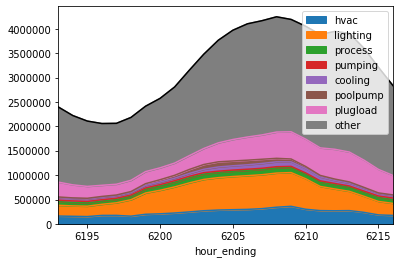

In [106]:
#Q3a, plot by end use on peak day

#First get the peak day.


#Compute day of year and hour of day and add to data frame
doy = (gross_dem.index-1)//24+1
hod = (((gross_dem.index-1) % 24) + 1)
gross_dem['doy'] = doy
gross_dem['hod'] = hod

#Extract the peak day
peak_day = doy[h_peak]

gross_peak_day = gross_dem.loc[gross_dem['doy'] == peak_day]

#Now plot
ax = gross_peak_day[list(eus)+['other']].plot.area()
gross_peak_day['total'].plot(color='black', ax=ax)
#Hmmmm... something's missing

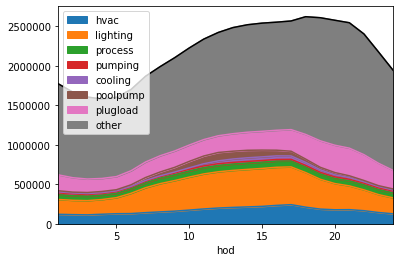

In [105]:
#Q3b Now average by hour of day

avg_day = gross_dem.groupby('hod').mean()
ax=avg_day[list(eus)+['other']].plot.area()
avg_day['total'].plot(color='black', ax=ax)

In [146]:
#Q4. Compute standard deviation normalized by the average daily value.
(gross_dem.groupby('doy').sum().std()/gross_dem.groupby('doy').sum().mean()).round(3)

#Residential cooling is most variable by a mile. Followed by commercial HVAC and industrial process and pumping loads. Probably temperature driven. 
#Pool pumps have the least because they just do the same thing every day.

total       0.116
other       0.106
hvac        0.179
lighting    0.150
process     0.164
pumping     0.164
cooling     1.181
poolpump    0.000
plugload    0.143
hod         0.000
dtype: float64

In [113]:
#Q5 Go get just office and retail lighting loads
#btypes
lighting_df = pd.DataFrame(np.zeros([8760,2]), columns=['office','retail'], index=gross_dem.index)
for cn in cs.index:
    bt = cs.loc[cn,'building_type']
    if bt in ['office', 'retail']:
        file = os.path.join(indir,cn+'.csv')
        c = pd.read_csv(file, index_col='hour_ending')
        lighting_df[bt] += c['lighting']
        
lighting_df.head()

office        retail
hour_ending                             
1.0          122587.993955  47174.230979
2.0          121106.974146  43819.479086
3.0          120049.915008  43686.699340
4.0          119428.777679  44776.466463
5.0          122719.629305  46244.452702

In [123]:
#5a Savings factor is just the ratio of the wattages
sav_fac = 1-80/110.
savings = lighting_df.sum().sum()*sav_fac/1.e9
print(savings)
print(savings/19.11)
lighting_df.sum()*sav_fac/1.e9

#Could save 0.8 TWh, primarily coming (about 2/3) from office. This is 4.2% of total energy consumption in all of SDGE.

0.8057335425681087
0.042162927397598575


office    0.510260
retail    0.295473
dtype: float64